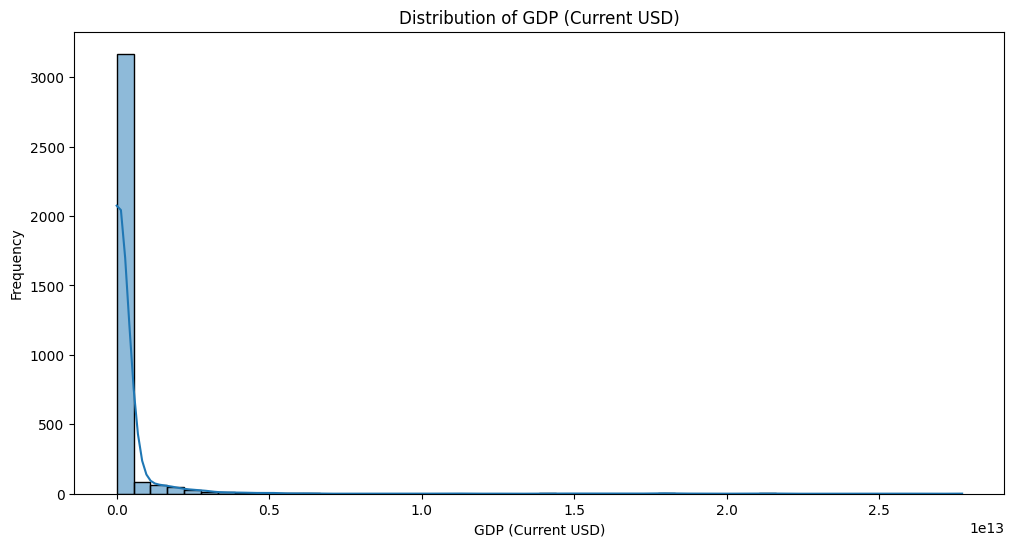

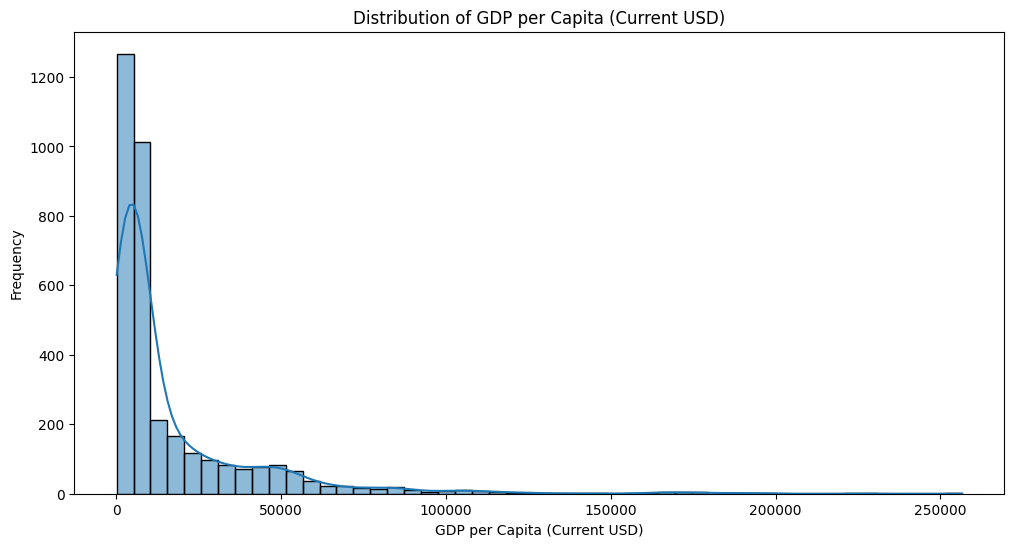

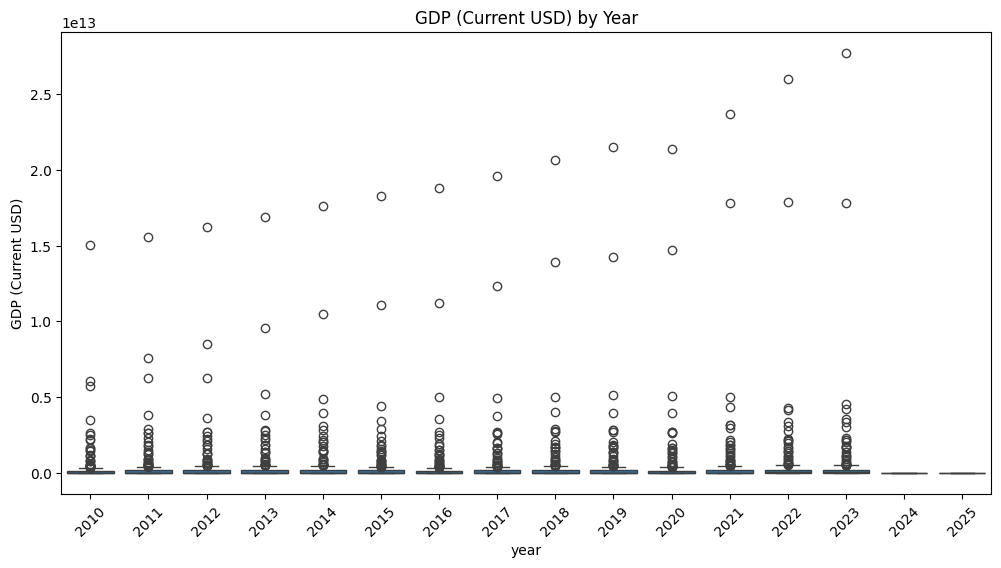

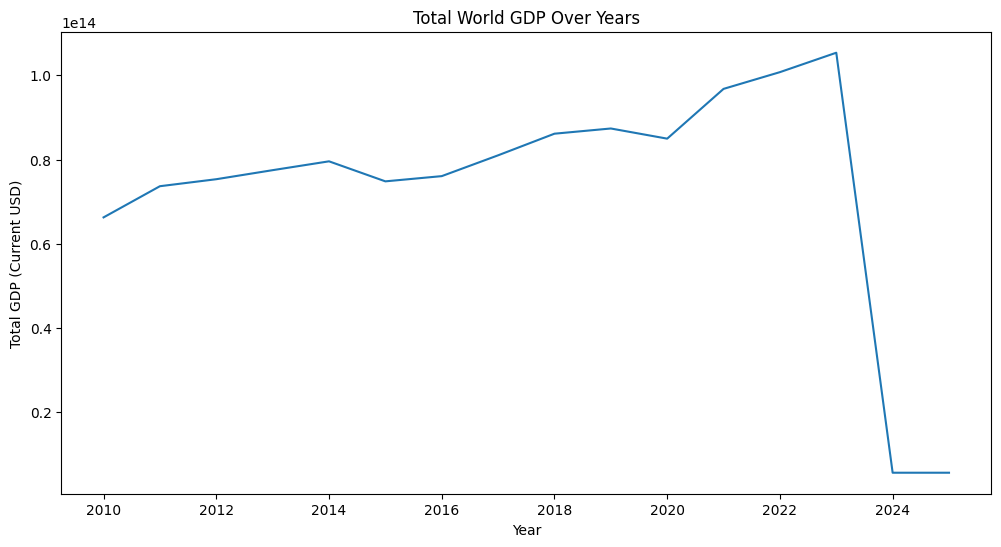

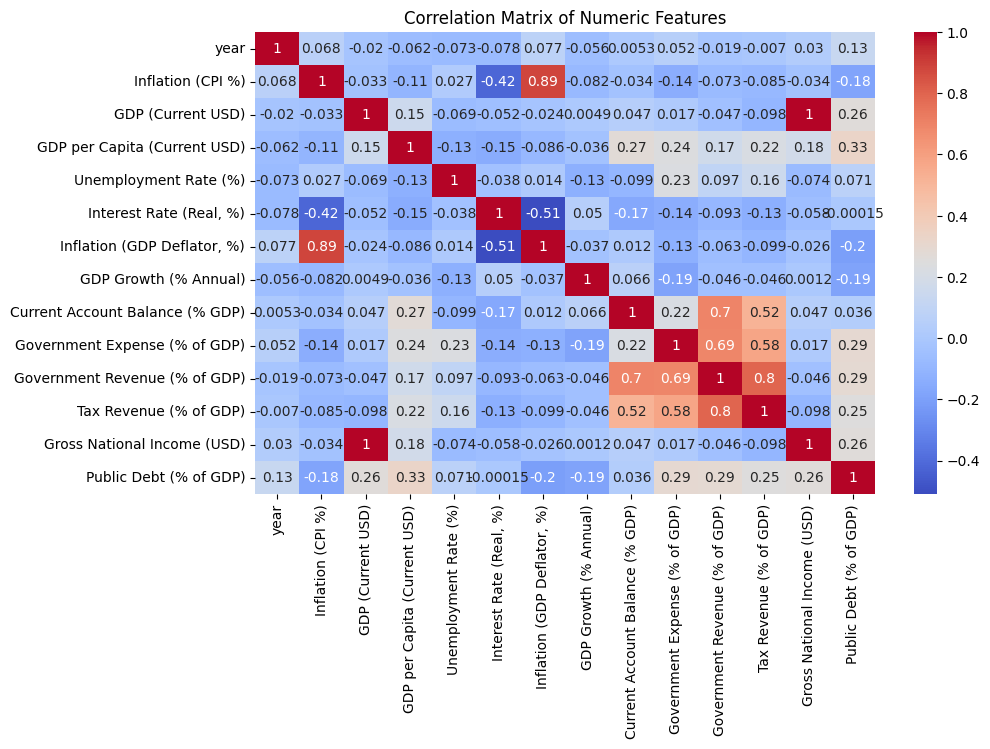

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\PC\OneDrive\Documents\Data Analytics Work\world_bank_data_2025.csv')

df = df.dropna(subset=['country_name', 'country_id', 'year'])

if not pd.api.types.is_integer_dtype(df['year']):
    df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')

for col in df.columns:
    if col not in ['country_name', 'country_id', 'year']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df['GDP (Current USD)'] = df['GDP (Current USD)'].fillna(df['GDP (Current USD)'].median())
df['GDP per Capita (Current USD)'] = df['GDP per Capita (Current USD)'].fillna(df['GDP per Capita (Current USD)'].median())

df = df.drop_duplicates()

df.to_csv(r'C:\Users\PC\OneDrive\Documents\Data Analytics Work\world_bank_data_2025_cleaned.csv', index=False)

plt.figure(figsize=(12, 6))
sns.histplot(df['GDP (Current USD)'], bins=50, kde=True)
plt.title('Distribution of GDP (Current USD)')
plt.xlabel('GDP (Current USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['GDP per Capita (Current USD)'], bins=50, kde=True)
plt.title('Distribution of GDP per Capita (Current USD)')
plt.xlabel('GDP per Capita (Current USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='GDP (Current USD)', data=df)
plt.title('GDP (Current USD) by Year')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='GDP (Current USD)', data=df.groupby('year')['GDP (Current USD)'].sum().reset_index())
plt.title('Total World GDP Over Years')
plt.xlabel('Year')
plt.ylabel('Total GDP (Current USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()
